# Predictive Modeling of Hospital Length of Stay and Discharge Type
# [Step 4: Outliers handling in the merged dataset]

his notebook focuses on identifying and handling outliers in the merged dataset, which includes both laboratory results and clinical data. 
Additional data cleaning steps are also performed.

**Libraries used:**  
- pandas  
- matplotlib  
- seaborn  

**Last updated:** March 26, 2025.  

## 1. Import libraries and load dataset

In [1]:
# Import data manipulation library
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define file paths for input dataset 
merged_data_path = "/home/anna/Desktop/Master_thesis/output_data/2_merged_data" 

# Define output path for cleaned output dataset  
cleaned_merged_data_path = "/home/anna/Desktop/Master_thesis/output_data/2_cleaned_merged_data"  

In [4]:
# Load dataset 
merged_data = pd.read_csv(merged_data_path)
display(merged_data)

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis_code,diagnosis_category,ALAT,AP,...,RDWn,THZn,TNThsn,Tbga,UREA,pCO2,pH,pO2,tHb,diagnosis_text
0,1,171465,Discharge,f,73,28,A04.70,Infectious diseases,10.0,NaN,...,18.3,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other bacterial intestinal infections
1,1,333396,Discharge,f,73,34,K57.22,Digestive diseases,19.0,93.0,...,18.8,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diverticular disease of intestine
2,2,27091,Discharge,m,51,13,T84.5,Injury & poisoning,NaN,NaN,...,18.9,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Infection and inflammatory reaction due to int...
3,2,36154,Discharge to another institution,m,50,12,I21.4,Circulatory diseases,38.0,58.0,...,14.4,131.0,367.0,NaN,4.5,NaN,NaN,NaN,NaN,Acute subendocardial myocardial infarction
4,2,142617,Discharge to another hospital,m,51,1,T84.5,Injury & poisoning,15.0,65.0,...,17.6,159.0,NaN,NaN,5.2,NaN,NaN,NaN,NaN,Infection and inflammatory reaction due to int...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269015,240988,393440,Discharge,m,79,2,K55.21,Digestive diseases,12.0,NaN,...,13.8,176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vascular disorders of intestine
269016,240988,412516,Discharge,m,79,10,I11.00,Circulatory diseases,11.0,NaN,...,14.3,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hypertensive heart disease
269017,240988,425806,Discharge to another institution,m,79,7,M16.7,Musculoskeletal diseases,NaN,NaN,...,13.2,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other secondary coxarthrosis
269018,240989,393141,Discharge,m,62,1,I49.3,Circulatory diseases,NaN,NaN,...,13.6,269.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ventricular premature depolarization


In [ ]:
### FATTO NEL FILE RPECEDENTE

# # Get the list of column names
# cols = list(merged_data.columns)

# # Move the last column between the 6th and 7th columns
# cols.insert(7, cols.pop(-1))

# # Reorder the DataFrame
# merged_data = merged_data[cols]

In [8]:
merged_data

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis_code,diagnosis_text,diagnosis_category,ALAT,...,Quicks,RDWn,THZn,TNThsn,Tbga,UREA,pCO2,pH,pO2,tHb
0,1,171465,Discharge,f,73,28,A04.70,Other bacterial intestinal infections,Infectious diseases,10.0,...,13.2,18.3,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,333396,Discharge,f,73,34,K57.22,Diverticular disease of intestine,Digestive diseases,19.0,...,11.6,18.8,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,27091,Discharge,m,51,13,T84.5,Infection and inflammatory reaction due to int...,Injury & poisoning,NaN,...,14.0,18.9,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,36154,Discharge to another institution,m,50,12,I21.4,Acute subendocardial myocardial infarction,Circulatory diseases,38.0,...,12.7,14.4,131.0,367.0,NaN,4.5,NaN,NaN,NaN,NaN
4,2,142617,Discharge to another hospital,m,51,1,T84.5,Infection and inflammatory reaction due to int...,Injury & poisoning,15.0,...,19.2,17.6,159.0,NaN,NaN,5.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269015,240988,393440,Discharge,m,79,2,K55.21,Vascular disorders of intestine,Digestive diseases,12.0,...,10.3,13.8,176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269016,240988,412516,Discharge,m,79,10,I11.00,Hypertensive heart disease,Circulatory diseases,11.0,...,11.0,14.3,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269017,240988,425806,Discharge to another institution,m,79,7,M16.7,Other secondary coxarthrosis,Musculoskeletal diseases,NaN,...,NaN,13.2,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269018,240989,393141,Discharge,m,62,1,I49.3,Ventricular premature depolarization,Circulatory diseases,NaN,...,10.9,13.6,269.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Check outliers

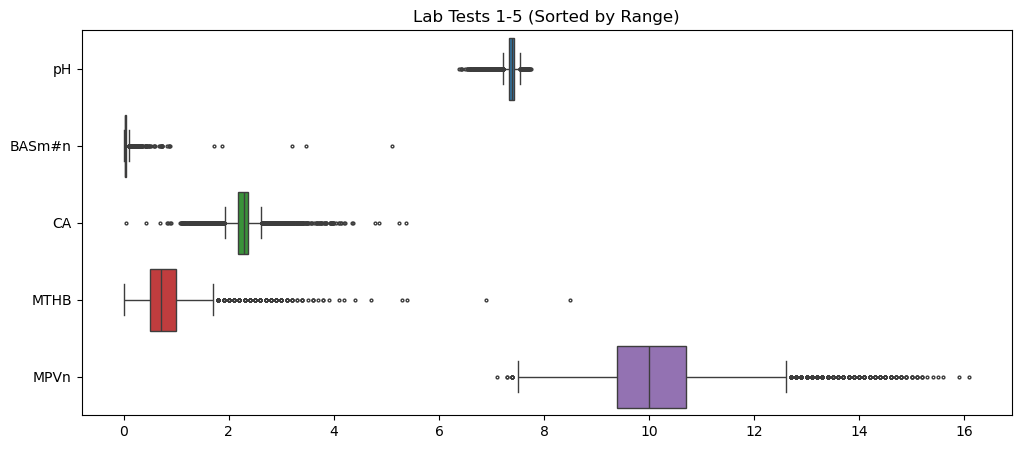

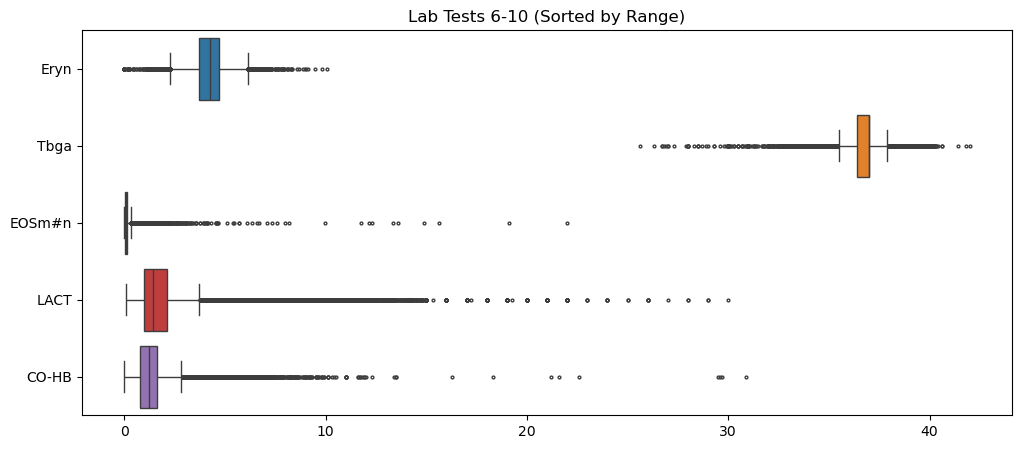

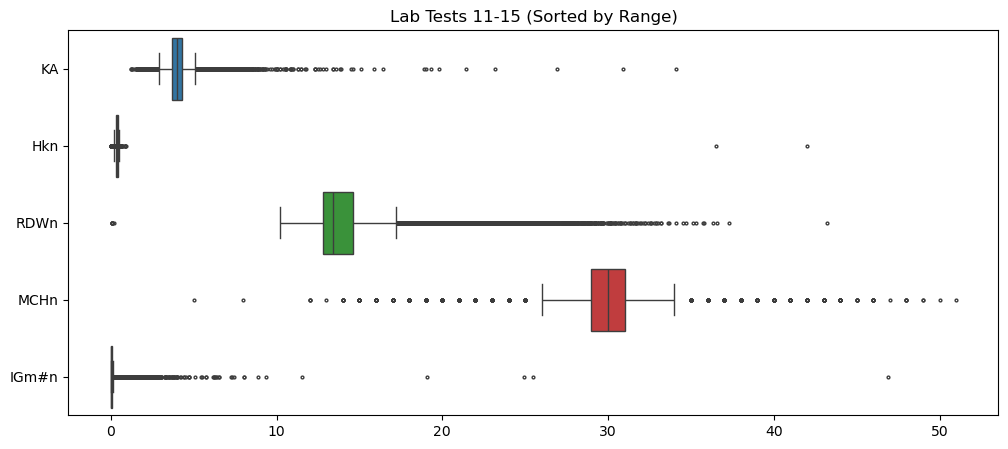

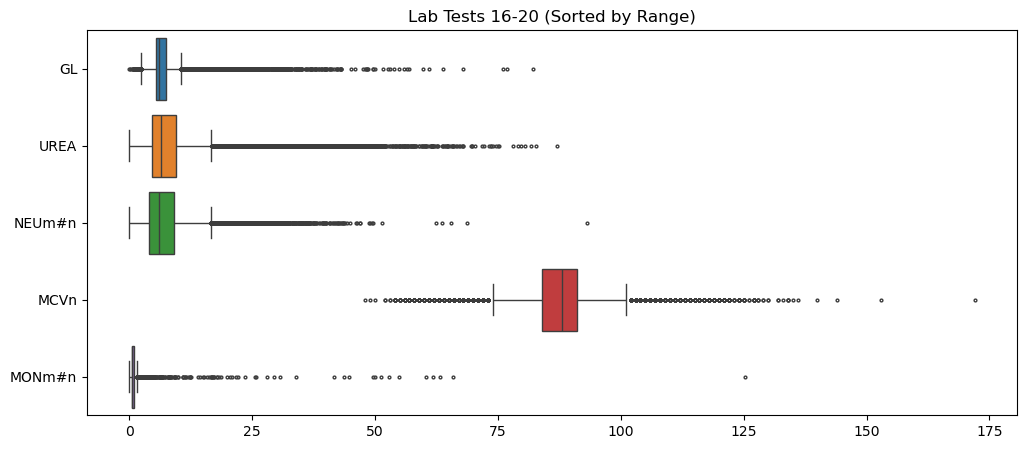

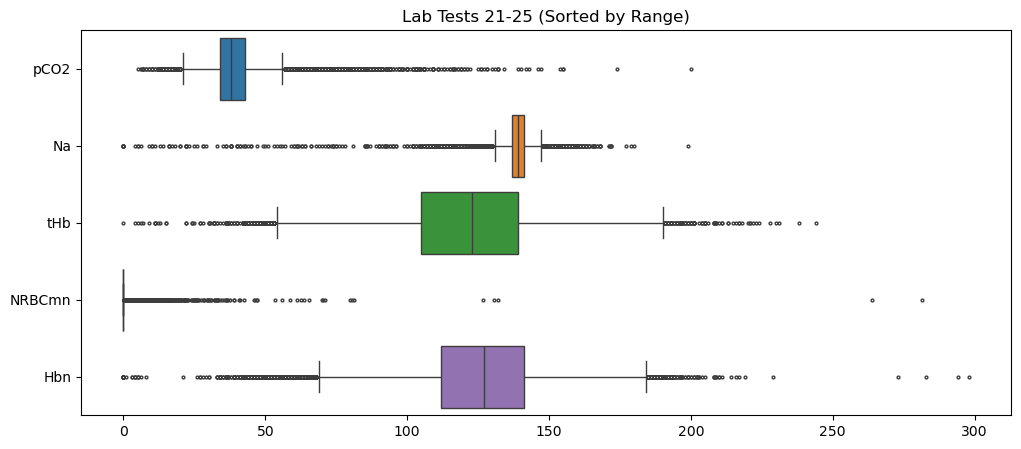

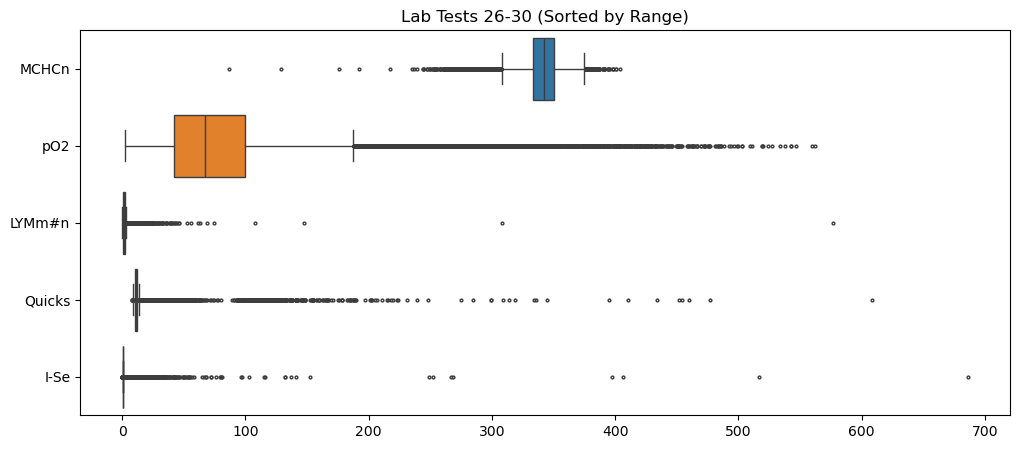

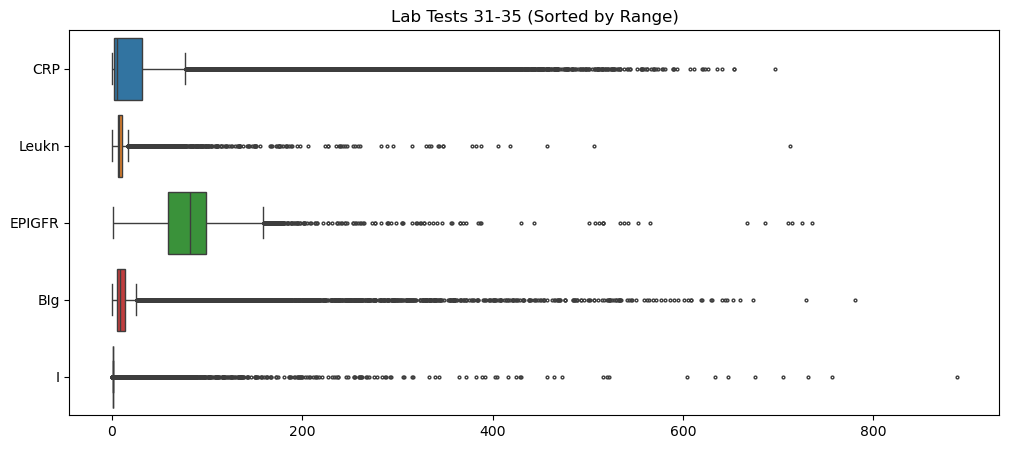

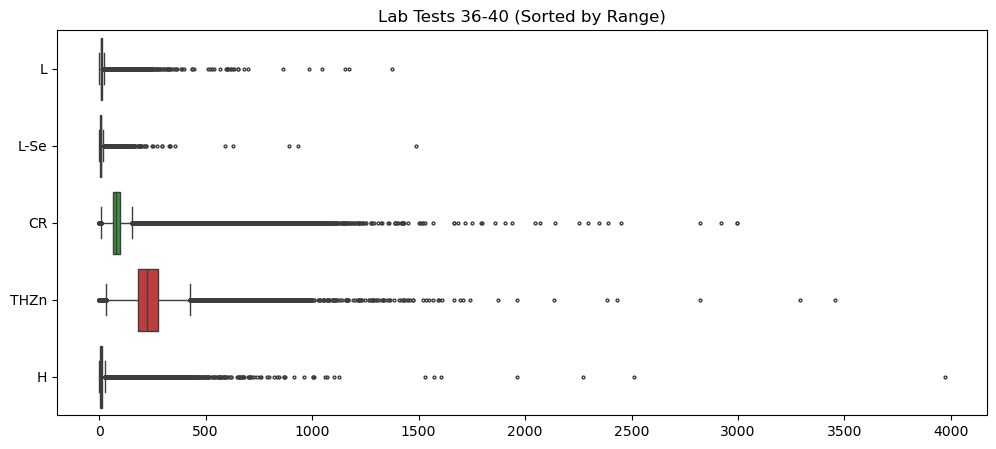

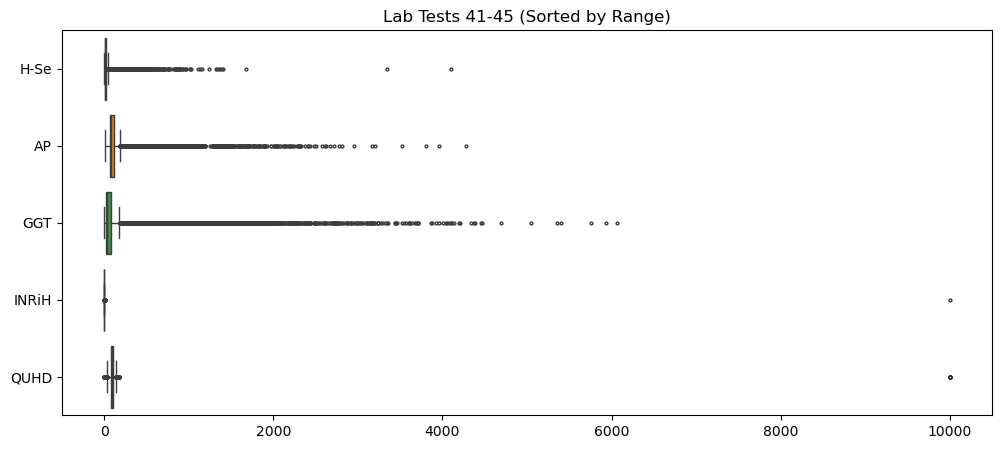

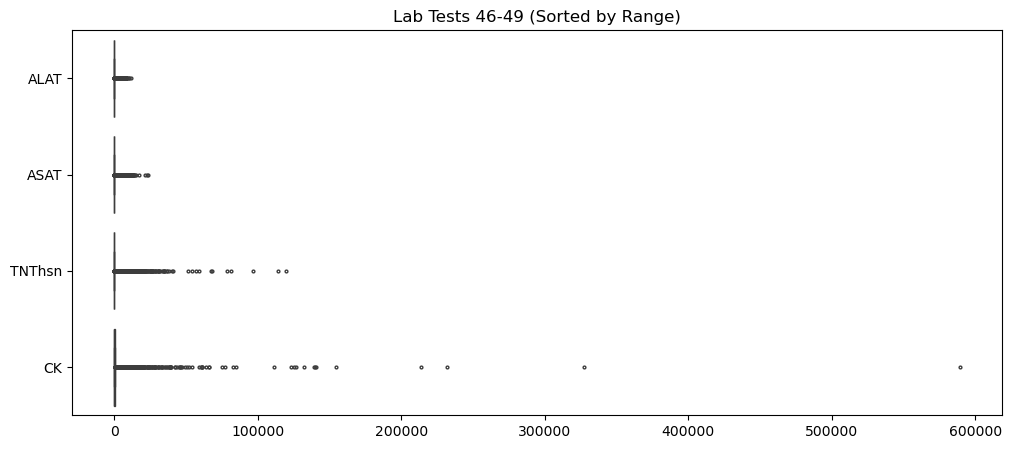

In [9]:
# Select lab test columns (from column 9 onward)
lab_test_cols = merged_data.columns[9:]

# Calculate range for each lab test
test_ranges = {col: merged_data[col].max() - merged_data[col].min() for col in lab_test_cols}

# Sort tests by range (smallest to largest)
sorted_tests = sorted(test_ranges, key=test_ranges.get)

# Plot every 5 parameters
num_tests = len(sorted_tests)
batch_size = 5

for i in range(0, num_tests, batch_size):
    batch = sorted_tests[i:i + batch_size]
    
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=merged_data[batch], orient="h", fliersize=2)
    plt.title(f"Lab Tests {i+1}-{min(i+batch_size, num_tests)} (Sorted by Range)")
    plt.show()

In [ ]:
# Define clinical columns to keep (excluding lab tests)
clinical_cols = [col for col in merged_data.columns if col not in lab_test_cols]

# Print top 1% highest and lowest values for each test
for test in sorted_tests:
    # Compute thresholds for the top 1% highest and lowest values
    lower_threshold = merged_data[test].quantile(0.01)
    upper_threshold = merged_data[test].quantile(0.99)

    # Filter rows that are in the lowest or highest 1%
    low_values = merged_data[merged_data[test] <= lower_threshold]
    high_values = merged_data[merged_data[test] >= upper_threshold]

    # Select relevant columns (clinical data + current test)
    selected_columns = clinical_cols + [test]

    # Print results
    print(f"\n{'='*50}\nLab Test: {test}\n{'='*50}")
    
    print("\nLowest 1% values:")
    print(low_values[selected_columns].sort_values(by=test).to_string(index=False))

    print("\nHighest 1% values:")
    print(high_values[selected_columns].sort_values(by=test, ascending=False).to_string(index=False))

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Temporarily impute missing values to apply Isolation Forest
imputer_temp = SimpleImputer(strategy='mean')  # or use median, etc.
merged_data_imputed_temp = merged_data.copy()
merged_data_imputed_temp[lab_test_cols] = imputer_temp.fit_transform(merged_data[lab_test_cols])

# Step 2: Apply Isolation Forest on the dataset with temporarily imputed values
iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination as needed
merged_data_imputed_temp['outlier'] = iso_forest.fit_predict(merged_data_imputed_temp[lab_test_cols])

# Step 3: Extract outliers (labeled as -1)
outliers = merged_data_imputed_temp[merged_data_imputed_temp['outlier'] == -1]

# Step 4: Extract non-outliers (labeled as 1)
merged_data_no_outliers = merged_data_imputed_temp[merged_data_imputed_temp['outlier'] == 1]

# Step 5: Inspect the outliers
print(f"Outliers detected (first 10 rows):\n")
print(outliers.head(10)[['diagnosis_code', 'diagnosis_text'] + lab_test_cols].to_string(index=False))

# Optionally: Display summary statistics for outliers
print("\nSummary statistics for outliers:")
print(outliers[lab_test_cols].describe())

# Step 6: Visualize outliers with boxplots for each lab test
plt.figure(figsize=(15, 6))
sns.boxplot(data=outliers[lab_test_cols])
plt.title("Boxplots for Outliers (per Lab Test)")
plt.xticks(rotation=90)
plt.show()

# Optionally: Filter and inspect extreme outliers (top 1% and bottom 1%)
for test in lab_test_cols:
    lower_threshold = outliers[test].quantile(0.01)
    upper_threshold = outliers[test].quantile(0.99)

    low_values = outliers[outliers[test] <= lower_threshold]
    high_values = outliers[outliers[test] >= upper_threshold]

    print(f"\nOutlier test: {test}")
    print("Lowest 1% values:")
    print(low_values[['diagnosis_code', 'diagnosis_text', test]])

    print("Highest 1% values:")
    print(high_values[['diagnosis_code', 'diagnosis_text', test]])

# Step 7: Impute missing values again after outliers are removed (for non-outliers)
imputer_final = SimpleImputer(strategy='mean')  # or use median, etc.
merged_data_final = merged_data_no_outliers.copy()
merged_data_final[lab_test_cols] = imputer_final.fit_transform(merged_data_no_outliers[lab_test_cols])

# Now merged_data_final contains outliers removed and missing values imputed
print("\nData after outliers removed and missing values imputed:")
print(merged_data_final.head())



In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Step 1: Temporarily impute missing values to apply Isolation Forest
imputer_temp = SimpleImputer(strategy='mean')  # or use median, etc.
merged_data_imputed_temp = merged_data.copy()
merged_data_imputed_temp[lab_test_cols] = imputer_temp.fit_transform(merged_data[lab_test_cols])

# Step 2: Apply Isolation Forest on the dataset with temporarily imputed values
iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination as needed
merged_data_imputed_temp['outlier'] = iso_forest.fit_predict(merged_data_imputed_temp[lab_test_cols])

# Outliers are labeled as -1, non-outliers as 1
merged_data_no_outliers = merged_data_imputed_temp[merged_data_imputed_temp['outlier'] == 1]

# Step 3: Impute missing values again after outliers are removed
imputer_final = SimpleImputer(strategy='mean')  # or use median, etc.
merged_data_final = merged_data_no_outliers.copy()
merged_data_final[lab_test_cols] = imputer_final.fit_transform(merged_data_no_outliers[lab_test_cols])

# Now merged_data_final contains outliers removed and missing values imputed
print(merged_data_final)


In [ ]:
# View the outliers
outliers = merged_data_imputed_temp[merged_data_imputed_temp['outlier'] == -1]
print("Outliers:")
print(outliers)

# # View the non-outliers
# non_outliers = merged_data[merged_data['outlier'] == 1]
# print("Non-Outliers:")
# print(non_outliers)
